<a href="https://colab.research.google.com/github/mhassanyahyaAI/Python/blob/master/Newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [5]:
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])


In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 2s 243us/step - loss: 2.6551 - acc: 0.5338 - val_loss: 1.7500 - val_acc: 0.6440
Epoch 2/20
7982/7982 [==============================] - 1s 133us/step - loss: 1.4273 - acc: 0.7070 - val_loss: 1.3016 - val_acc: 0.7160
Epoch 3/20
7982/7982 [==============================] - 1s 133us/step - loss: 1.0557 - acc: 0.7815 - val_loss: 1.1443 - val_acc: 0.7470
Epoch 4/20
7982/7982 [==============================] - 1s 132us/step - loss: 0.8310 - acc: 0.8282 - val_loss: 1.0345 - val_acc: 0.7810
Epoch 5/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.6584 - acc: 0.8616 - val_loss: 0.9939 - val_acc: 0.7860
Epoch 6/20
7982/7982 [==============================] - 1s 132us/step - loss: 0.5329 - acc: 0.8885 - val_loss: 0.9332 - val_acc: 0.8050
Epoch 7/20
7982/7982 [============

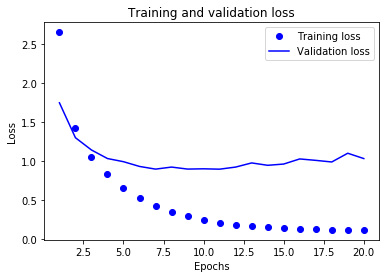

In [14]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

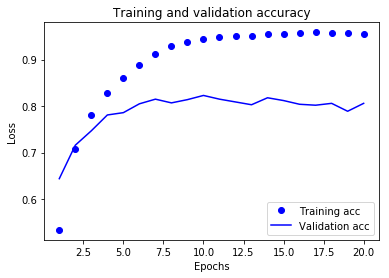

In [15]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 157us/step - loss: 2.4993 - acc: 0.5241 - val_loss: 1.6724 - val_acc: 0.6510
Epoch 2/9
7982/7982 [==============================] - 1s 133us/step - loss: 1.3734 - acc: 0.7081 - val_loss: 1.2999 - val_acc: 0.7060
Epoch 3/9
7982/7982 [==============================] - 1s 135us/step - loss: 1.0287 - acc: 0.7788 - val_loss: 1.1164 - val_acc: 0.7710
Epoch 4/9
7982/7982 [==============================] - 1s 132us/step - loss: 0.8047 - acc: 0.8334 - val_loss: 1.1110 - val_acc: 0.7510
Epoch 5/9
7982/7982 [==============================] - 1s 137us/step - loss: 0.6441 - acc: 0.8644 - val_loss: 0.9757 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 131us/step - loss: 0.5097 - acc: 0.8936 - val_loss: 0.9246 - val_acc: 0.8050
Epoch 7/9
7982/7982 [==============================] - 1s 133us/step - loss: 0.4145 - acc: 0.9132 - val_loss: 0.8873 - val_acc: 0.8130
Epoch 8